# Exploring TA-lib (TA indicators and visualisations) part 1

## 1. Data Preparation
### 1.1 Import packages and read in data file

In [1]:
## import packages
import talib as ta
import mplfinance as mpf

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## read file 
## This file is provided by project tutor, which is originally extracted from OANDA
eur_jpy = pd.read_csv('data/EUR_JPY_M30.csv')

In [3]:
eur_jpy

,datetime,open,high,low,close
0,2005-01-02T18:30:00.000000000Z,139.100,139.110,139.050,139.050
1,2005-01-02T19:00:00.000000000Z,139.160,139.230,139.090,139.200
2,2005-01-02T19:30:00.000000000Z,139.200,139.300,139.130,139.200
3,2005-01-02T20:00:00.000000000Z,139.200,139.210,139.180,139.200
4,2005-01-02T20:30:00.000000000Z,139.210,139.250,139.030,139.120
...,...,...,...,...,...
204750,2021-02-26T21:00:00.000000000Z,128.598,128.640,128.563,128.624
204751,2021-02-26T21:30:00.000000000Z,128.628,128.680,128.585,128.655
204752,2021-02-28T22:00:00.000000000Z,128.625,128.855,128.533,128.663
204753,2021-02-28T22:30:00.000000000Z,128.677,129.142,128.630,128.676


### 1.2 Set time-series index 

In [4]:
## convert to datetime type
eur_jpy['datetime'] = pd.to_datetime(eur_jpy['datetime'])

In [5]:
## remove the timezone
eur_jpy['datetime'] = eur_jpy['datetime'].dt.tz_localize(None)

In [6]:
## set index 
eur_jpy.set_index('datetime', inplace=True)

In [7]:
eur_jpy

,open,high,low,close
datetime,,,,
2005-01-02 18:30:00,139.100,139.110,139.050,139.050
2005-01-02 19:00:00,139.160,139.230,139.090,139.200
2005-01-02 19:30:00,139.200,139.300,139.130,139.200
2005-01-02 20:00:00,139.200,139.210,139.180,139.200
2005-01-02 20:30:00,139.210,139.250,139.030,139.120
...,...,...,...,...
2021-02-26 21:00:00,128.598,128.640,128.563,128.624
2021-02-26 21:30:00,128.628,128.680,128.585,128.655
2021-02-28 22:00:00,128.625,128.855,128.533,128.663


### 1.3 Extract data in the duration of Feb 2021

In [8]:
eur_jpy_202102 = eur_jpy[eur_jpy.index>='2021-02-01']
eur_jpy_202102 = eur_jpy_202102[eur_jpy_202102.index<'2021-03-01']

In [9]:
eur_jpy_202102

,open,high,low,close
datetime,,,,
2021-02-01 00:00:00,126.944,126.996,126.906,126.982
2021-02-01 00:30:00,126.985,126.985,126.896,126.979
2021-02-01 01:00:00,126.982,126.996,126.944,126.960
2021-02-01 01:30:00,126.964,126.974,126.913,126.964
2021-02-01 02:00:00,126.961,127.002,126.951,126.999
...,...,...,...,...
2021-02-26 21:00:00,128.598,128.640,128.563,128.624
2021-02-26 21:30:00,128.628,128.680,128.585,128.655
2021-02-28 22:00:00,128.625,128.855,128.533,128.663


### 1.4 Extract data in the duration of year 2020

In [10]:
eur_jpy_2020 = eur_jpy[eur_jpy.index>='2020-01-01']
eur_jpy_2020 = eur_jpy_2020[eur_jpy_2020.index<'2021-01-01']

In [11]:
eur_jpy_2020

,open,high,low,close
datetime,,,,
2020-01-01 22:00:00,121.820,122.040,121.731,121.865
2020-01-01 22:30:00,121.798,121.895,121.747,121.883
2020-01-01 23:00:00,121.877,121.980,121.846,121.974
2020-01-01 23:30:00,121.970,121.985,121.946,121.985
2020-01-02 00:00:00,121.982,121.994,121.909,121.909
...,...,...,...,...
2020-12-31 19:30:00,126.167,126.208,126.084,126.090
2020-12-31 20:00:00,126.094,126.156,126.094,126.136
2020-12-31 20:30:00,126.132,126.170,126.126,126.140


###  2. Visualising candlestick chart using mplfinance package
* mplfinance is a matplotlib package to visualise financial data
* official documentation:   https://pypi.org/project/mplfinance/#:~:text=This%20repository%2C%20matplotlib%2Fmplfinance%20%2C,manually%22%20with%20the%20old%20API.  
* github:   
https://github.com/matplotlib/mplfinance/tree/master/examples  
  https://github.com/matplotlib/mplfinance


In [12]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

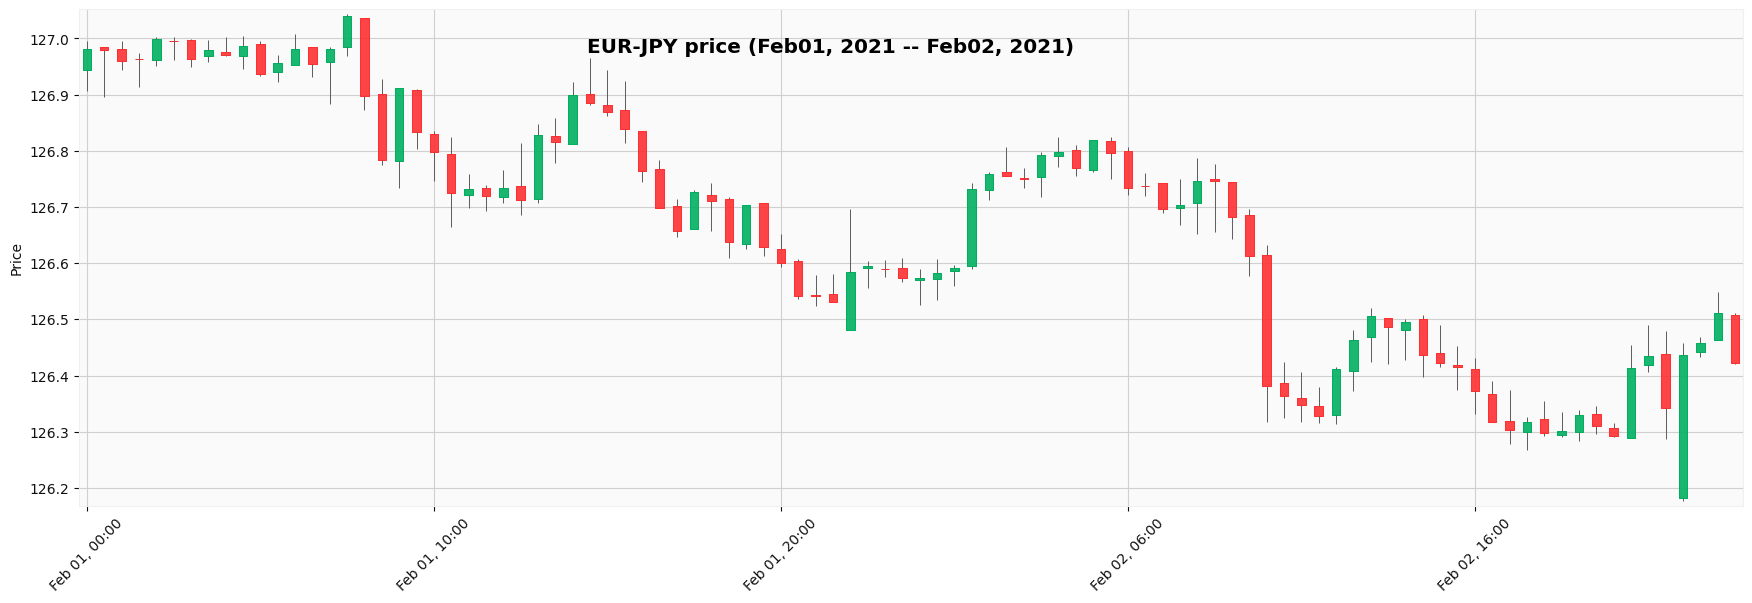

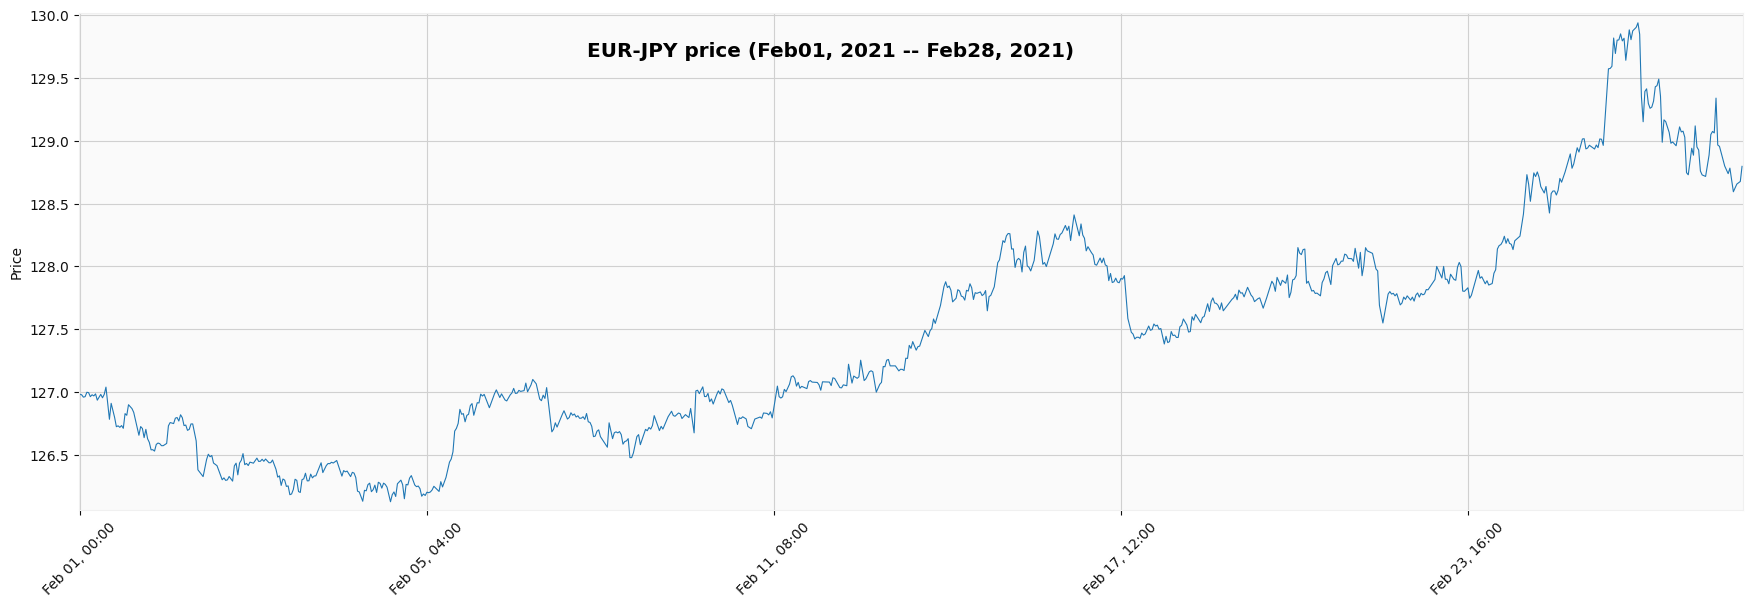

In [13]:
customised_style = mpf.make_mpf_style(base_mpf_style='yahoo', 
                                      y_on_right=False)
# ref. https://github.com/matplotlib/mplfinance/blob/master/examples/styles.ipynb

kws=dict(style=customised_style, 
         tight_layout=True, 
         figratio=(20,6))

mpf.plot(eur_jpy_202102.iloc[:96, :],  ## Feb01-Feb02
         **kws,
         type='candle', 
         title='EUR-JPY price (Feb01, 2021 -- Feb02, 2021)') 
mpf.plot(eur_jpy_202102,  ## Feb01-Feb28
         **kws,
         type='line', 
         title='EUR-JPY price (Feb01, 2021 -- Feb28, 2021)') 

### 3. Exploring TA indicators using TA-lib package
* online tutorial: https://www.youtube.com/watch?v=cXBwDxW_EeI
* TA-lib documentation: https://mrjbq7.github.io/ta-lib/

In [14]:
dir(ta)

['ACOS',
 'AD',
 'ADD',
 'ADOSC',
 'ADX',
 'ADXR',
 'APO',
 'AROON',
 'AROONOSC',
 'ASIN',
 'ATAN',
 'ATR',
 'AVGPRICE',
 'BBANDS',
 'BETA',
 'BOP',
 'CCI',
 'CDL2CROWS',
 'CDL3BLACKCROWS',
 'CDL3INSIDE',
 'CDL3LINESTRIKE',
 'CDL3OUTSIDE',
 'CDL3STARSINSOUTH',
 'CDL3WHITESOLDIERS',
 'CDLABANDONEDBABY',
 'CDLADVANCEBLOCK',
 'CDLBELTHOLD',
 'CDLBREAKAWAY',
 'CDLCLOSINGMARUBOZU',
 'CDLCONCEALBABYSWALL',
 'CDLCOUNTERATTACK',
 'CDLDARKCLOUDCOVER',
 'CDLDOJI',
 'CDLDOJISTAR',
 'CDLDRAGONFLYDOJI',
 'CDLENGULFING',
 'CDLEVENINGDOJISTAR',
 'CDLEVENINGSTAR',
 'CDLGAPSIDESIDEWHITE',
 'CDLGRAVESTONEDOJI',
 'CDLHAMMER',
 'CDLHANGINGMAN',
 'CDLHARAMI',
 'CDLHARAMICROSS',
 'CDLHIGHWAVE',
 'CDLHIKKAKE',
 'CDLHIKKAKEMOD',
 'CDLHOMINGPIGEON',
 'CDLIDENTICAL3CROWS',
 'CDLINNECK',
 'CDLINVERTEDHAMMER',
 'CDLKICKING',
 'CDLKICKINGBYLENGTH',
 'CDLLADDERBOTTOM',
 'CDLLONGLEGGEDDOJI',
 'CDLLONGLINE',
 'CDLMARUBOZU',
 'CDLMATCHINGLOW',
 'CDLMATHOLD',
 'CDLMORNINGDOJISTAR',
 'CDLMORNINGSTAR',
 'CDLONNECK',
 'CD

### 3.1 Overlap Studies

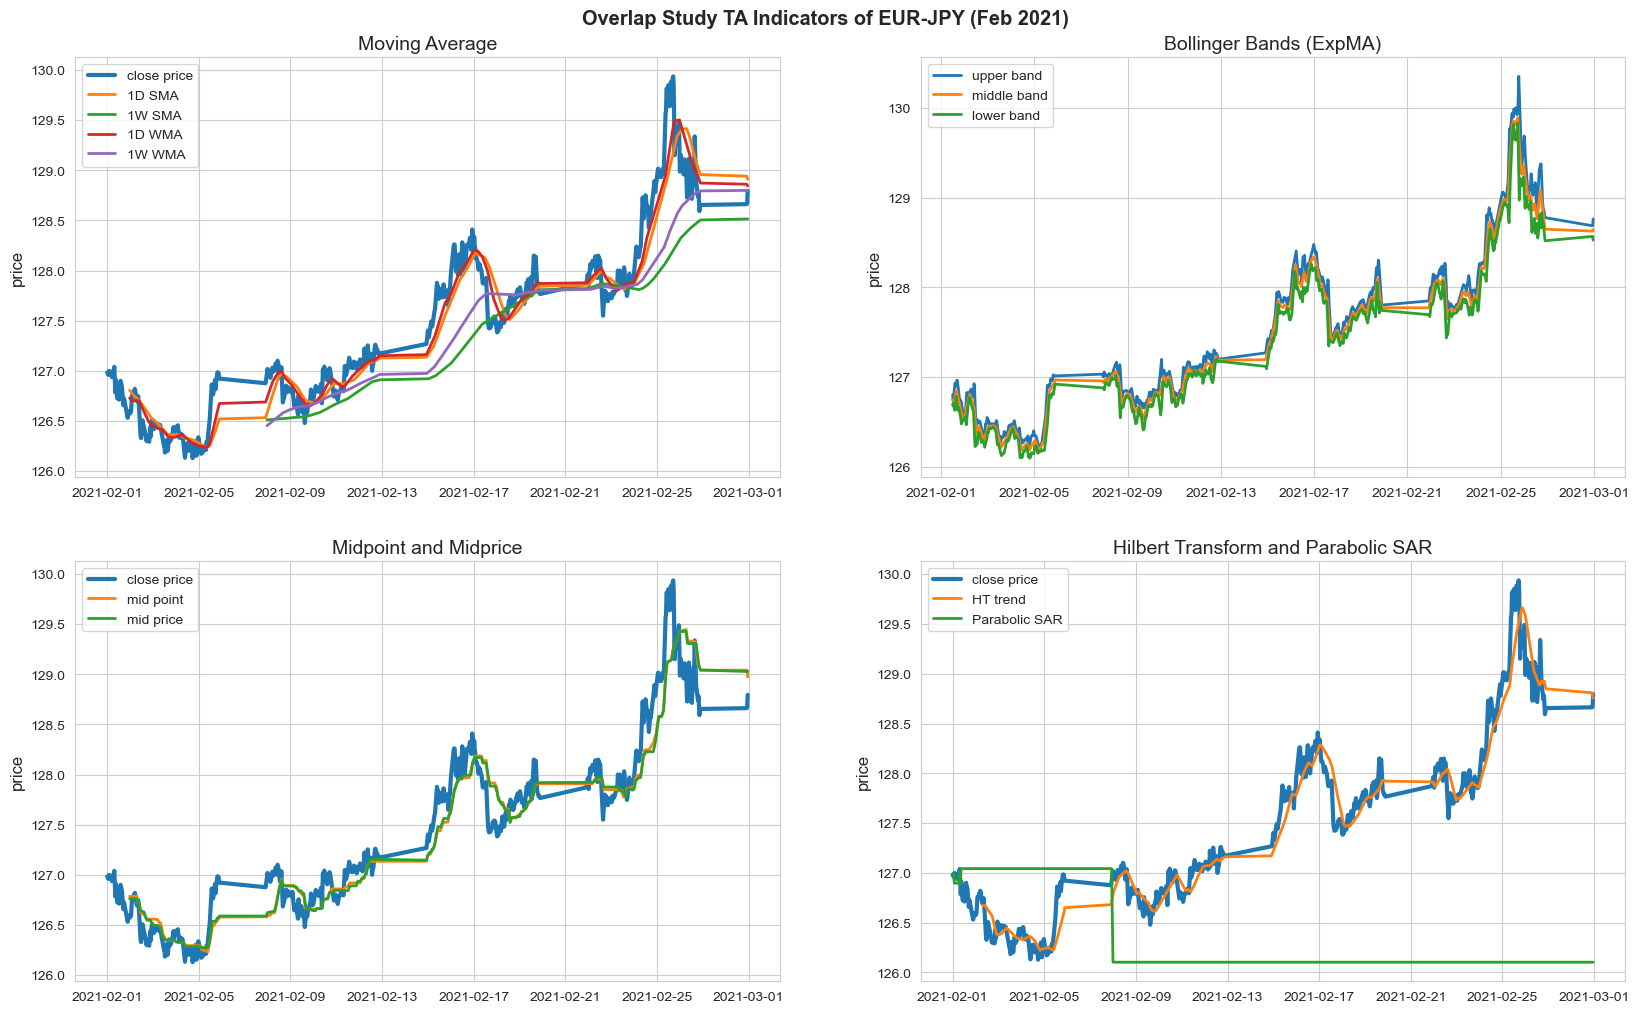

In [15]:
open_ = eur_jpy_202102['open'].values
high_ = eur_jpy_202102['high'].values
low_ = eur_jpy_202102['low'].values
close_ = eur_jpy_202102['close'].values
dt = eur_jpy_202102.index

sns.set_style("whitegrid")


## create frmae of subplots
fig, ax = plt.subplots(2, 2, figsize=(20,12))
fig.suptitle('Overlap Study TA Indicators of EUR-JPY (Feb 2021)', y=0.92)

## 1. moving average
# SMA / T3 / WMA: smoothing function of the underlying curve
# fit to close price and use look back window of 48/96/240
sma48 = ta.SMA(close_, 48) ## SMA in order 48 (1 day)
# sma96 = ta.SMA(close_, 96) ## SMA in order 96(2 day)
sma240 = ta.SMA(close_, 240) ## SMA in order 240 (1 week)
# t3 = ta.T3(close_, 240, vfactor=0) ## Triple Exponential Moving Average (T3 of 1 week)
wma48 = ta.WMA(close_, 48)
wma240 = ta.WMA(close_, 240)


sns.lineplot(ax=ax[0,0], x=dt, y=close_, label='close price', linewidth=3)
sns.lineplot(ax=ax[0,0], x=dt, y=sma48, label='1D SMA', linewidth=2)
# sns.lineplot(ax=ax[0,0], x=dt, y=sma96, label='2D SMA', linewidth=2)
sns.lineplot(ax=ax[0,0], x=dt, y=sma240, label='1W SMA', linewidth=2)
sns.lineplot(ax=ax[0,0], x=dt, y=wma48, label='1D WMA', linewidth=2)
sns.lineplot(ax=ax[0,0], x=dt, y=wma240, label='1W WMA', linewidth=2)


ax[0,0].set_title('Moving Average', size=14)
ax[0,0].set_ylabel('price', size=12)


## 2. bollinger bands 
# Calculating bollinger bands, with triple exponential moving average:
from talib import MA_Type
upper, middle, lower = ta.BBANDS(close_, matype=MA_Type.T3)
sns.lineplot(ax=ax[0,1], x=dt, y=upper, label='upper band', linewidth=2)
sns.lineplot(ax=ax[0,1], x=dt, y=middle, label='middle band', linewidth=2)
sns.lineplot(ax=ax[0,1], x=dt, y=lower, label='lower band', linewidth=2)
ax[0,1].set_title('Bollinger Bands (ExpMA)', size=14)
ax[0,1].set_ylabel('price', size=12)

## 3. mid point and mid price
midpoint = ta.MIDPOINT(close_, timeperiod=48)
midprice = ta.MIDPRICE(high_, low_, timeperiod=48)
sns.lineplot(ax=ax[1,0], x=dt, y=close_, label='close price', linewidth=3)
sns.lineplot(ax=ax[1,0], x=dt, y=midpoint, label='mid point', linewidth=2)
sns.lineplot(ax=ax[1,0], x=dt, y=midprice, label='mid price', linewidth=2)
ax[1,0].set_title('Midpoint and Midprice', size=14)
ax[1,0].set_ylabel('price', size=12)


## 4. HT trendline and Parabolic SAR
ht_trend = ta.HT_TRENDLINE(close_)
sar = ta.SAR(high_, low_, acceleration=0, maximum=0)
sns.lineplot(ax=ax[1,1], x=dt, y=close_, label='close price', linewidth=3)
sns.lineplot(ax=ax[1,1], x=dt, y=ht_trend, label='HT trend', linewidth=2)
sns.lineplot(ax=ax[1,1], x=dt, y=sar, label='Parabolic SAR', linewidth=2)
ax[1,1].set_title('HT trend and Parabolic SAR', size=14)
ax[1,1].set_ylabel('price', size=12)


## set datetime as common x labels
for i in range(0,2):
    for j in range(0,2):
        ax[i,j].set(xlabel=None)
    

plt.show()

### 3.2 Momentum Indicators

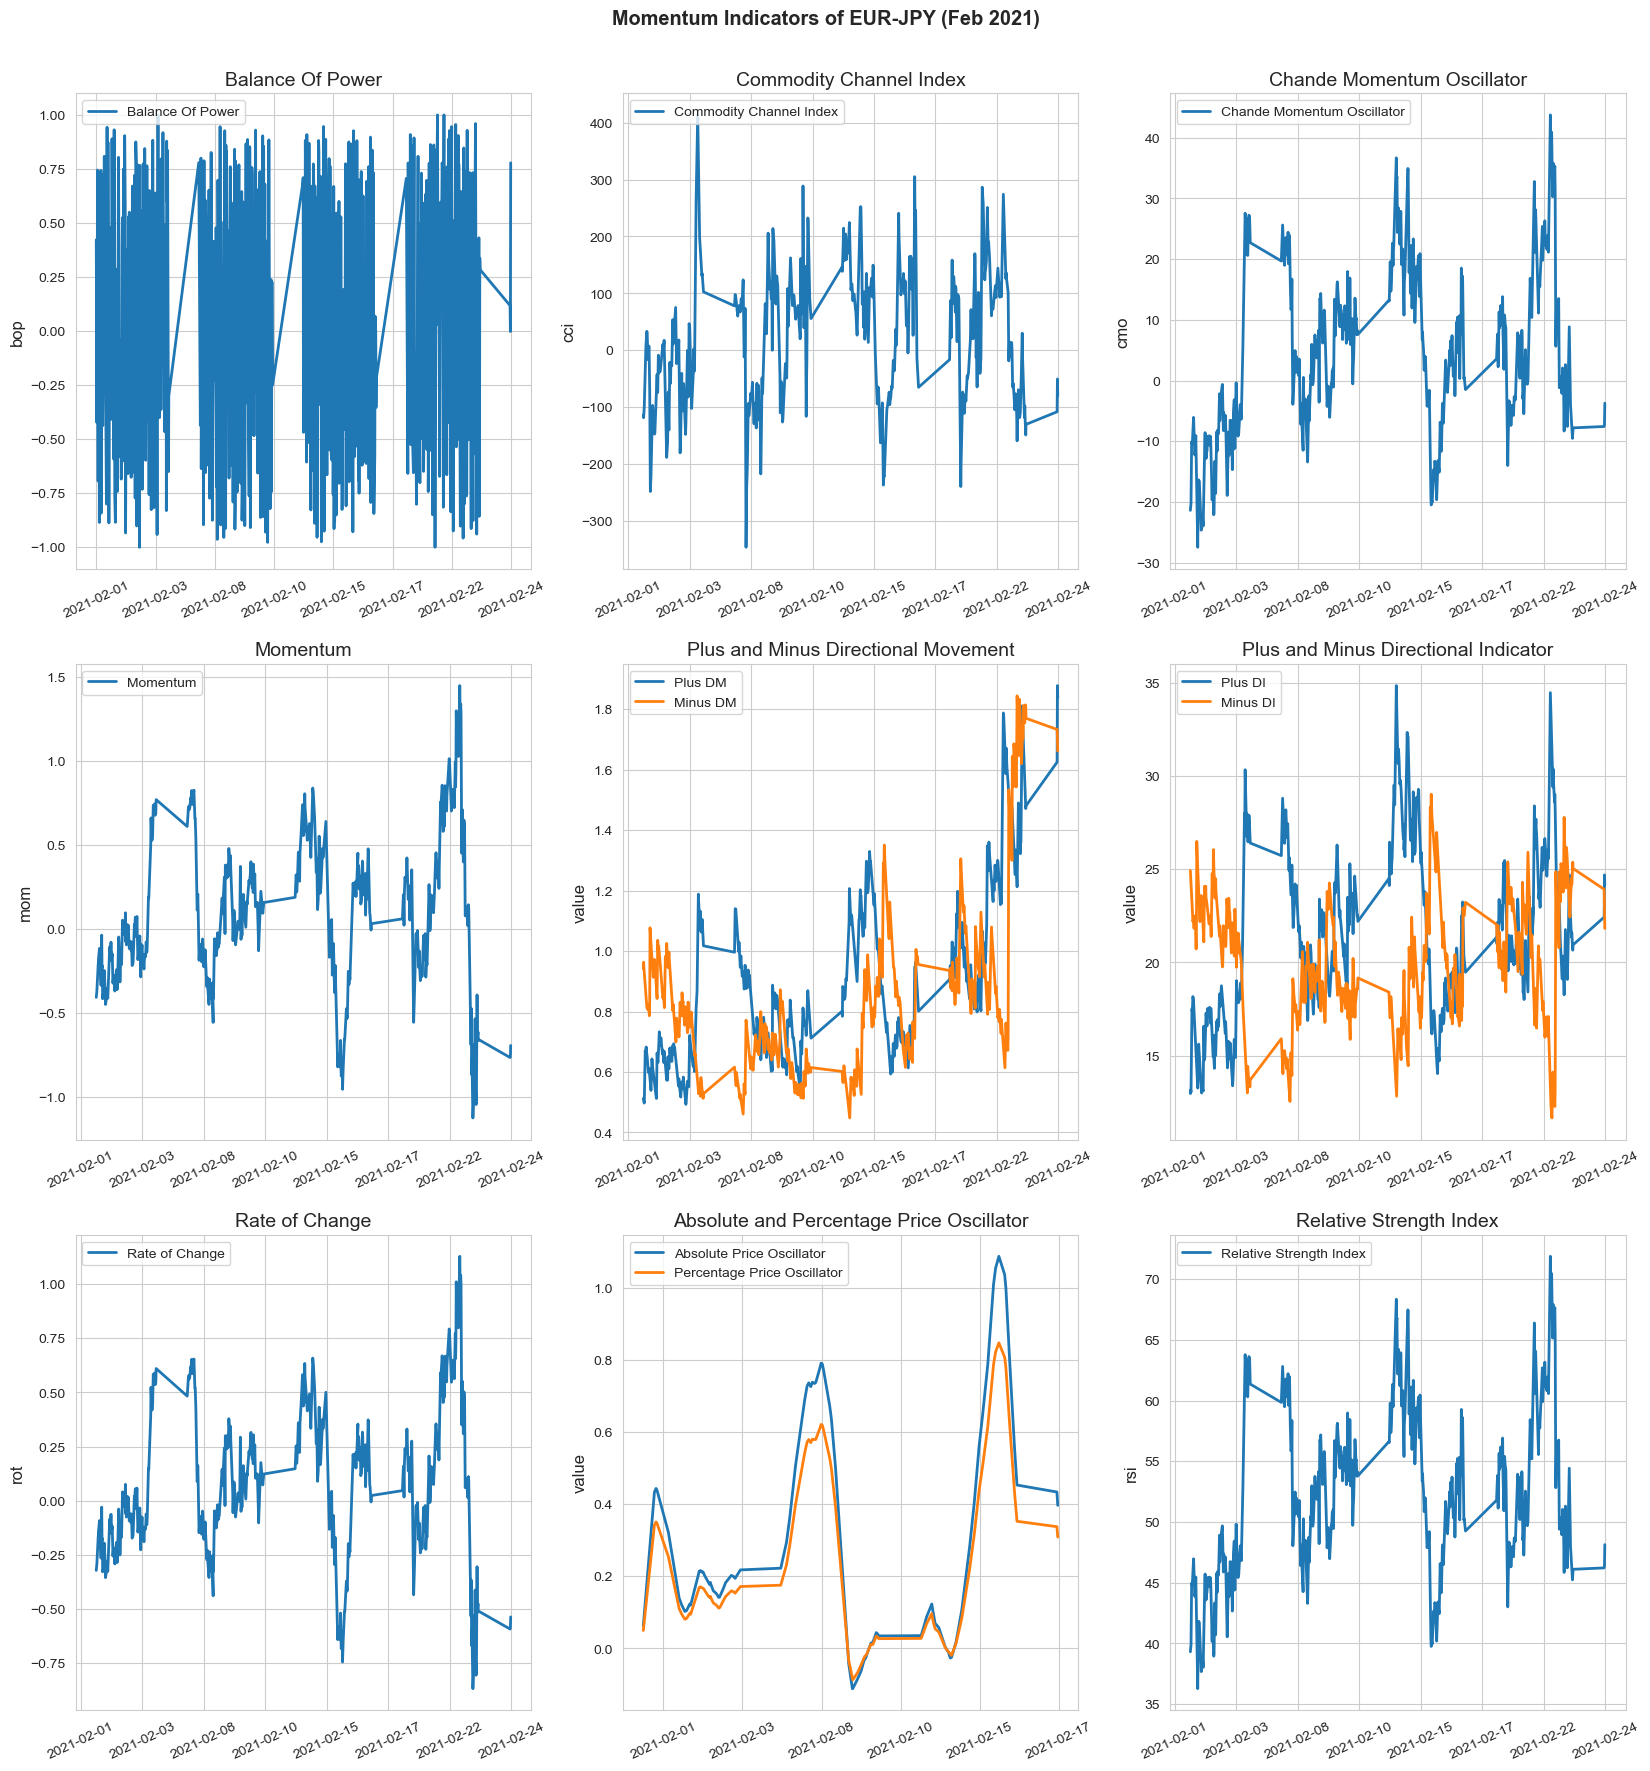

In [20]:
open_ = eur_jpy_202102['open'].values
high_ = eur_jpy_202102['high'].values
low_ = eur_jpy_202102['low'].values
close_ = eur_jpy_202102['close'].values
dt = eur_jpy_202102.index

sns.set_style("whitegrid")


## create frmae of subplots
fig, ax = plt.subplots(3, 3, figsize=(20,21))
fig.suptitle('Momentum Indicators of EUR-JPY (Feb 2021)', y=0.92)

## 1. Balance of Power
bop = ta.BOP(open_, high_, low_, close_)
sns.lineplot(ax=ax[0,0], x=dt, y=bop, label='Balance Of Power', linewidth=2)
ax[0,0].set_title('Balance Of Power', size=14)
ax[0,0].set_ylabel('bop', size=12)


## 2. Commodity Channel Index
cci = ta.CCI(high_, low_, close_, 48)  ## 1 day CCI
sns.lineplot(ax=ax[0,1], x=dt, y=cci, label='Commodity Channel Index', linewidth=2)
ax[0,1].set_title('Commodity Channel Index', size=14)
ax[0,1].set_ylabel('cci', size=12)


## 3. Chande Momentum Oscillator
cmo = ta.CMO(close_, 48)
sns.lineplot(ax=ax[0,2], x=dt, y=cmo, label='Chande Momentum Oscillator', linewidth=2)
ax[0,2].set_title('Chande Momentum Oscillator', size=14)
ax[0,2].set_ylabel('cmo', size=12)

## 4. Momentum
mom = ta.MOM(close_, 48)
sns.lineplot(ax=ax[1,0], x=dt, y=mom, label='Momentum', linewidth=2)
ax[1,0].set_title('Momentum', size=14)
ax[1,0].set_ylabel('mom', size=12)

## 5. minus and plus Directional Movement
minus_dm = ta.MINUS_DM(high_, low_, 48)
plus_dm = ta.PLUS_DM(high_, low_, 48)
sns.lineplot(ax=ax[1,1], x=dt, y=plus_dm, label='Plus DM', linewidth=2)
sns.lineplot(ax=ax[1,1], x=dt, y=minus_dm, label='Minus DM', linewidth=2)
ax[1,1].set_title('Plus and Minus Directional Movement', size=14)
ax[1,1].set_ylabel('value', size=12)


## 6. minus and plus Directional Indicator
minus_di = ta.MINUS_DI(high_, low_, close_, 48)
plus_di = ta.PLUS_DI(high_, low_, close_, 48)
sns.lineplot(ax=ax[1,2], x=dt, y=plus_di, label='Plus DI', linewidth=2)
sns.lineplot(ax=ax[1,2], x=dt, y=minus_di, label='Minus DI', linewidth=2)
ax[1,2].set_title('Plus and Minus Directional Indicator', size=14)
ax[1,2].set_ylabel('value', size=12)


## 7. Rate of Change
roc = ta.ROC(close_, 48)
# rocp = ta.ROCR(close_, 48)
sns.lineplot(ax=ax[2,0], x=dt, y=roc, label='Rate of Change', linewidth=2)
# sns.lineplot(ax=ax[2,0], x=dt, y=rocp, label='ROCP', linewidth=2)
ax[2,0].set_title('Rate of Change', size=14)
ax[2,0].set_ylabel('rot', size=12)


## 8. Absolute and Percentage Price Oscillator
apo = ta.APO(close_, fastperiod=48, slowperiod=240, matype=0)
ppo = ta.PPO(close_, fastperiod=48, slowperiod=240, matype=0)
sns.lineplot(ax=ax[2,1], x=dt, y=apo, label='Absolute Price Oscillator', linewidth=2)
sns.lineplot(ax=ax[2,1], x=dt, y=ppo, label='Percentage Price Oscillator', linewidth=2)
ax[2,1].set_title('Absolute and Percentage Price Oscillator', size=14)
ax[2,1].set_ylabel('value', size=12)


## 9. Relative Strength Index
rsi = ta.RSI(close_, 48)
sns.lineplot(ax=ax[2,2], x=dt, y=rsi, label='Relative Strength Index', linewidth=2)
ax[2,2].set_title('Relative Strength Index', size=14)
ax[2,2].set_ylabel('rsi', size=12)


## set datetime as common x labels
for i in range(0,3):
    for j in range(0,3):
        ax[i,j].set(xlabel=None)
        ax[i,j].legend(loc="upper left")
        ax[i,j].set_xticklabels(labels=[x for x in dt.strftime('%Y-%m-%d')][::122], rotation=25)

    

plt.show()

### 3.3 Pattern Recognition

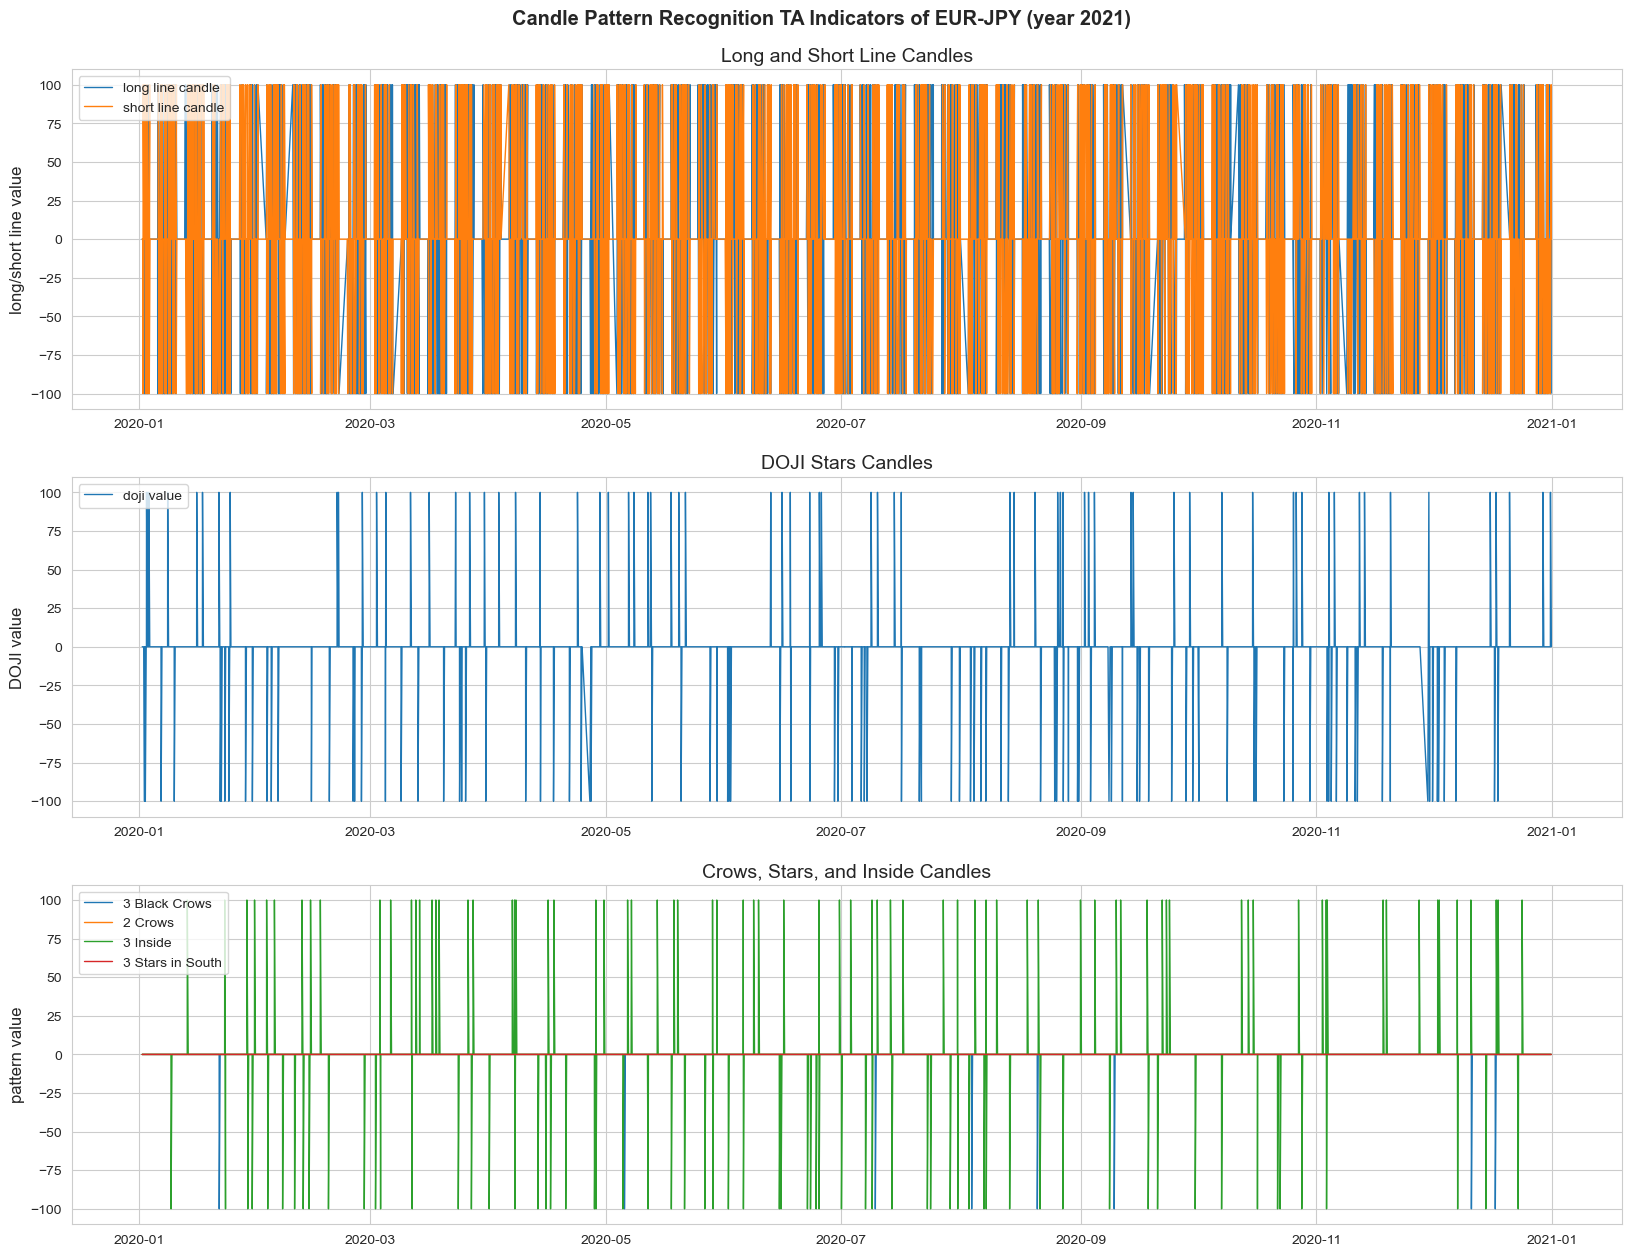

In [17]:
open_ = eur_jpy_2020['open'].values
high_ = eur_jpy_2020['high'].values
low_ = eur_jpy_2020['low'].values
close_ = eur_jpy_2020['close'].values
dt = eur_jpy_2020.index


## create frmae of subplots
fig, ax = plt.subplots(3, 1, figsize=(20,15))
fig.suptitle('Candle Pattern Recognition TA Indicators of EUR-JPY (year 2021)', y=0.92)

## 1. Long and short line candles
longs = ta.CDLLONGLINE(open_, high_, low_, close_)
shorts = ta.CDLSHORTLINE(open_, high_, low_, close_)
sns.lineplot(ax=ax[0], x=dt, y=longs, label='long line candle', linewidth=1)
sns.lineplot(ax=ax[0], x=dt, y=shorts, label='short line candle', linewidth=1)
ax[0].set_title('Long and Short Line Candles', size=14)
ax[0].set_ylabel('long/short line value', size=12)



# ## 2. DOJI signals
# doji = ta.CDLDOJI(open_, high_, low_, close_)
# num_dojisignals = sum(doji==100)  ## calculate number of DOJI signals
# sns.lineplot(ax=ax[0], x=dt, y=doji, linewidth=1)
# ax[0].set_title('DOJI Signals ('+str(num_dojisignals)+' in total)', size=14)
# ax[0].set_ylabel('DOJI value', size=12)


## 2. DOJI stars
doji_star = ta.CDLDOJISTAR(open_, high_, low_, close_)
# num_dojistars = sum(doji_star==100)  ## calculate number of DOJI signals
sns.lineplot(ax=ax[1], x=dt, y=doji_star, label='doji value', linewidth=1)
ax[1].set_title('DOJI Stars Candles', size=14)
ax[1].set_ylabel('DOJI value', size=12)


## 3. three black crows
blackcrows3 = ta.CDL3BLACKCROWS(open_, high_, low_, close_)
crows2 = ta.CDL2CROWS(open_, high_, low_, close_)
inside = ta.CDL3INSIDE(open_, high_, low_, close_)
stars3 = ta.CDL3STARSINSOUTH(open_, high_, low_, close_)

sns.lineplot(ax=ax[2], x=dt, y=blackcrows3, label='3 Black Crows', linewidth=1)
sns.lineplot(ax=ax[2], x=dt, y=crows2, label='2 Crows', linewidth=1)
sns.lineplot(ax=ax[2], x=dt, y=inside, label='3 Inside', linewidth=1)
sns.lineplot(ax=ax[2], x=dt, y=stars3, label='3 Stars in South', linewidth=1)

ax[2].set_title('Crows, Stars, and Inside Candles', size=14)
ax[2].set_ylabel('pattern value', size=12)


## set common x labels and legend locations
for i in range(0,3):
    ax[i].set(xlabel=None)
    ax[i].legend(loc="upper left")


plt.show()